https://www.paramountbusinessjets.com/aviation-terminology/taxi-time.html#:~:text=Taxi%20time%20is%20the%20total,to%20the%20hanger%20or%20terminal



Taxi time is the total time of an aircraft's movement on the ground. Taxi time can be the time it takes an aircraft to go from a hanger or terminal to the runway until cleared for takeoff or the aircraft going from exiting the runway back to the hanger or terminal. It is used by pilots to determine various kinds of information pertinent to the flight, such as fuel burn, total fuel loss, weight, takeoff weight, landing weight, and true airspeed. Since weight plays a huge part in whether an aircraft can take off or land the amount of time a plane spends burning fuel on the ground, taxiing can greatly alter the planes takeoff or landing distances.


In larger airports there tend to be more runways allowing for the takeoff of many aircraft at one time

In [7]:
import numpy as np 
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data_path = 'C:/Users/Jesse/Desktop/midterm_data/data/'

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [3]:
flights_df = pd.read_csv(data_path + 'flights.csv')
flights_df.head()

C:\Users\Jesse\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-08-22,B6,B6,B6,984,B6,N281JB,984,14492,RDU,...,612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-08-22,B6,B6,B6,987,B6,N978JB,987,10721,BOS,...,2611,39.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2019-08-22,B6,B6,B6,988,B6,N983JT,988,12892,LAX,...,2611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-08-22,B6,B6,B6,989,B6,N339JB,989,10721,BOS,...,399,18.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-08-22,B6,B6,B6,990,B6,N583JB,990,13204,MCO,...,944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# There are missing values in taxi_out, taxi_in, dep_time and arr_time

flights_df.isna().sum()

fl_date                       0
mkt_unique_carrier            0
branded_code_share            0
mkt_carrier                   0
mkt_carrier_fl_num            0
op_unique_carrier             0
tail_num                  49269
op_carrier_fl_num             0
origin_airport_id             0
origin                        0
origin_city_name              0
dest_airport_id               0
dest                          0
dest_city_name                0
crs_dep_time                  0
dep_time                 258814
dep_delay                263754
taxi_out                 273274
wheels_off               273264
wheels_on                281162
taxi_in                  281172
crs_arr_time                  0
arr_time                 275079
arr_delay                311744
cancelled                     0
cancellation_code      15658277
diverted                      0
dup                           0
crs_elapsed_time             20
actual_elapsed_time      309157
air_time                 315221
flights 

In [8]:
# Taxi_out time and departure time
taxiout_depart_df = flights_df.loc[(flights_df['taxi_out'].notna()) & (flights_df['dep_time'].notna())]
taxiin_arrival_df = flights_df.loc[(flights_df['taxi_in'].notna()) & (flights_df['arr_time'].notna())]

In [9]:
# This will convert the int to a string format 'hh:mm'
def convert_time_to_string(x):
    if np.isnan(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'
    
    string = str(int(x))
    
    if len(string) < 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]


# After conversion to string we then convert to date time
# Then we set up a column just for hour 
# Group by hour and watch taxi_out time change throughout the day

In [10]:
# Example
convert_time_to_string(345)

'03:45'

In [11]:
taxiout_depart_df['dep_time'] = taxiout_depart_df['dep_time'].apply(lambda x: convert_time_to_string(x))
taxiout_depart_df['dep_time'] = pd.to_datetime(taxiout_depart_df['dep_time'], format ='%H:%M')
taxiout_depart_df['dep_hour'] = taxiout_depart_df['dep_time'].dt.hour



taxiin_arrival_df['arr_time'] = taxiin_arrival_df['arr_time'].apply(lambda x: convert_time_to_string(x))
taxiin_arrival_df['arr_time'] = pd.to_datetime(taxiin_arrival_df['arr_time'], format ='%H:%M')
taxiin_arrival_df['arr_hour'] = taxiin_arrival_df['arr_time'].dt.hour


dep_hour_taxi_out = taxiout_depart_df.groupby('dep_hour')['taxi_out'].mean()
arr_hour_taxi_in = taxiin_arrival_df.groupby('arr_hour')['taxi_in'].mean()

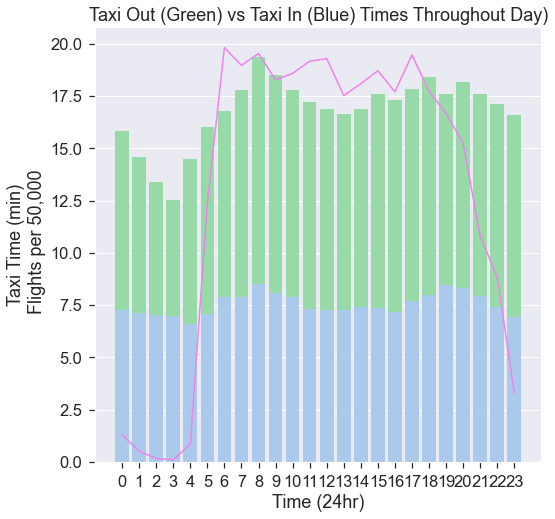

In [93]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(8,8))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x=dep_hour_taxi_out.index, y=dep_hour_taxi_out.values,  color="g")
axis = sns.barplot(x=arr_hour_taxi_in.index, y=arr_hour_taxi_in.values, color="b")
axis1 = sns.lineplot(x=flights_per_hour.index, y=flights_per_hour.values/(50000),  color="violet", ls='--')

axis.set(xlabel="Time (24hr)", ylabel='Taxi Time (min)\n Flights per 50,000', title=('Taxi Out (Green) vs Taxi In (Blue) Times Throughout Day)'));




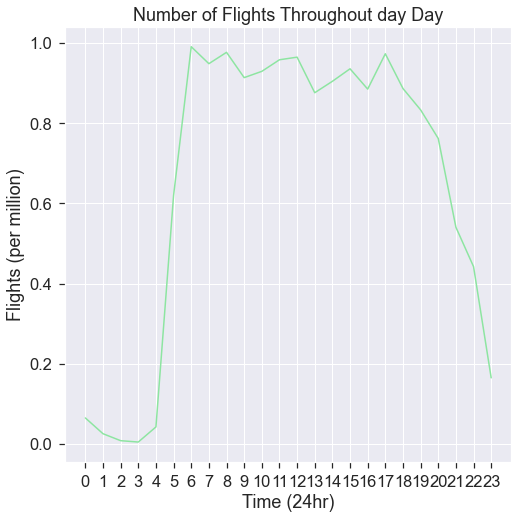

In [66]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(8,8))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.lineplot(x=flights_per_hour.index, y=flights_per_hour.values/(1000000),  color="g")


axis.set(xticks= flights_per_hour.index, xlabel="Time (24hr)", ylabel='Flights (per million)', title=('Number of Flights Throughout day Day'));




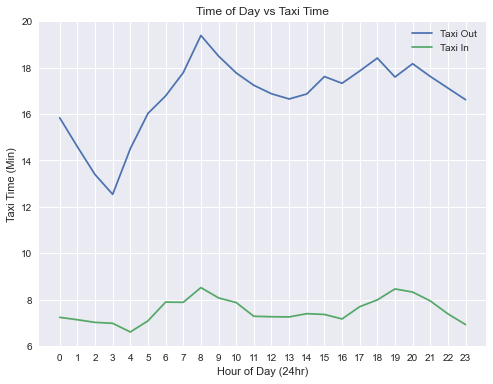

In [22]:
plt.figure(figsize=(8,6))

plt.plot(dep_hour_taxi_out.index, dep_hour_taxi_out.values, label='Taxi Out')
plt.plot(arr_hour_taxi_in.index, arr_hour_taxi_in.values, label='Taxi In')


plt.xticks(dep_hour_taxi_out.index);
plt.title('Time of Day vs Taxi Time')
plt.xlabel('Hour of Day (24hr)')
plt.ylabel('Taxi Time (Min)')

plt.legend()
plt.show()

How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [35]:
flights_per_hour = taxiout_depart_df.loc[taxiout_depart_df['cancelled'] != 1].groupby('dep_hour')['fl_date'].count()

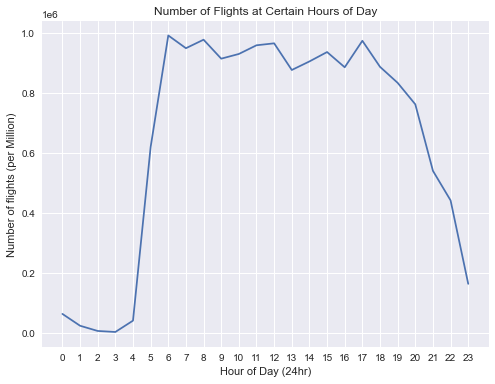

In [25]:
plt.figure(figsize=(8,6))

plt.plot(flights_per_hour.index, flights_per_hour.values)
plt.xticks(flights_per_hour.index)
plt.title('Number of Flights at Certain Hours of Day')
plt.xlabel('Hour of Day (24hr)')
plt.ylabel('Number of flights (per Million)');

In [ ]:
# f,ax=plt.subplots(1,2,figsize=(20,8))
